In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

# Load the 'tips' dataset from Seaborn
tips = sns.load_dataset("tips")

# Define categorical columns for encoding
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Perform one-hot encoding on the categorical columns
ohe = OneHotEncoder()
one_hot_encoded = ohe.fit_transform(tips[categorical_cols])

# Convert the sparse matrix to a DataFrame
ohe_df = pd.DataFrame(one_hot_encoded.toarray(),
                          columns=ohe.get_feature_names_out(categorical_cols)
                          )

# Concatenate the one-hot encoded DataFrame with the original 'tips' DataFrame
tips_encoded = pd.concat([tips, ohe_df], axis=1) # merge two dataframes
tips_encoded.drop(categorical_cols, axis=1, inplace=True)  # Drop original categorical columns
tips_encoded

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Split data into features and target
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=667
                                                    )

# Create and train the Random Forest classifier
dt_reg = DecisionTreeRegressor(random_state=667)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

In [19]:
confronto = pd.DataFrame(data = [y_pred,y_test])
confronto = confronto.T
confronto.columns = ['predetti', 'reali_test']
confronto

,predetti,reali_test
0,2.00,3.00
1,3.02,2.20
2,3.76,3.25
3,2.00,5.00
4,2.00,1.61
5,3.06,2.00
6,2.50,2.00
7,1.01,3.50
8,4.34,4.71
9,1.00,5.15


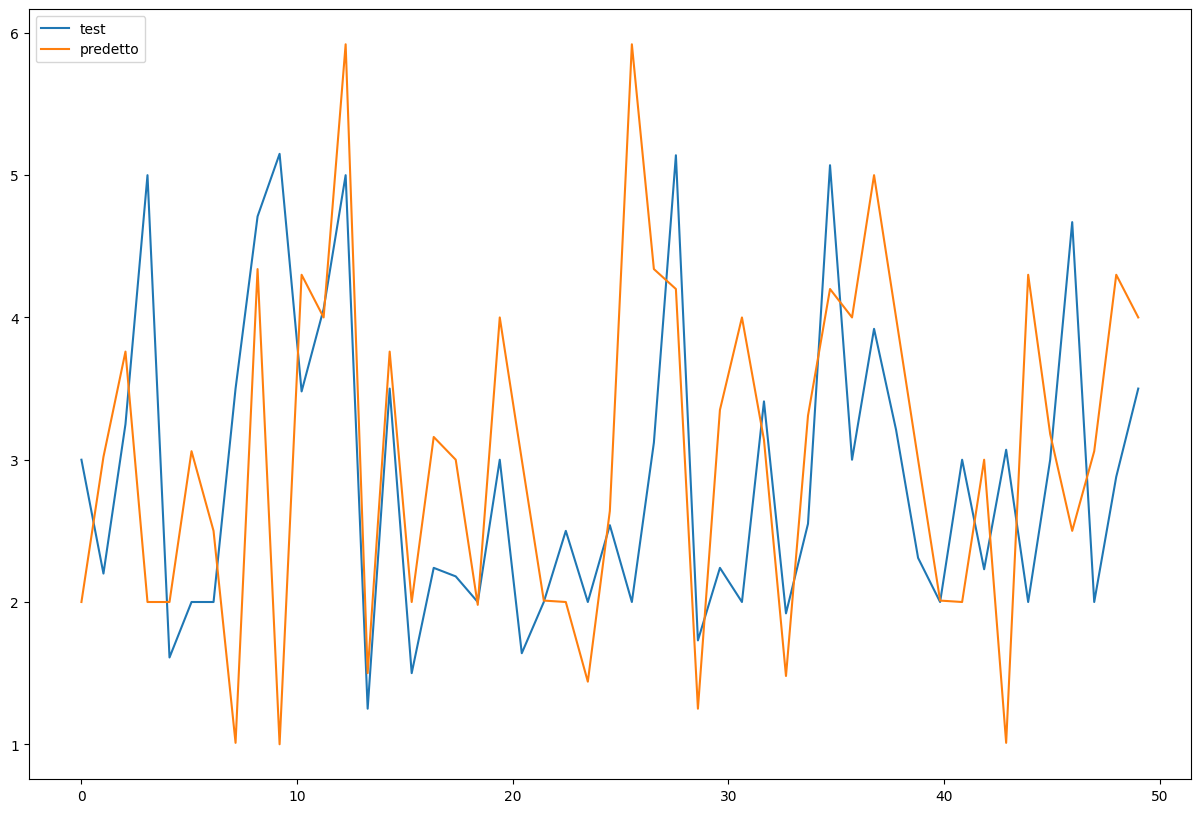

In [20]:
import numpy as np
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [21]:
# Misurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2score = r2_score(y_test, y_pred)
ad_r2score = 1-(1-r2score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2_score: ', r2score)
print('Adjusted_R2_score: ', ad_r2score)

MAE:  1.0087755102040816
MSE:  1.8405938775510204
RMSE:  1.3566848851339874
R2_score:  -0.614403507037667
Adjusted_R2_score:  -1.152538009383556
